In [4]:

import torch
import numpy as np
import matplotlib.pyplot as plt
import GaussianDiffusion

In [5]:
shape = (3, 124, 124)

In [6]:
z, y, x = [np.arange(0, end) for end in shape]

In [9]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123])

In [80]:
# x = torch.rand(1, 1, 256, 256)
octave=2
persistence=0.8
frequency = 16
num_timesteps = 1000
in_channels = 3

In [81]:
x = torch.rand(1, in_channels, 64, 64)
t = torch.randint(0, num_timesteps, (x.shape[0],), device=x.device)

In [82]:
simplexnoise = GaussianDiffusion.generate_simplex_4noise(x, t)

In [83]:
avnoise = torch.empty(100, 1, in_channels, 64, 64)
for i in range(100):
    avnoise[i, ...] = GaussianDiffusion.generate_simplex_4noise(x, t)
# avnoise = np.array(avnoise)    

In [84]:
# avnoise

In [85]:
avns = torch.mean(avnoise, dim = 0)

In [86]:
avns.shape

torch.Size([1, 3, 64, 64])

In [87]:
def plot_tensor(tensor):
    array = tensor.numpy()
    array = array.transpose(1, 2, 0)
    plt.imshow(array, cmap = 'gray')
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


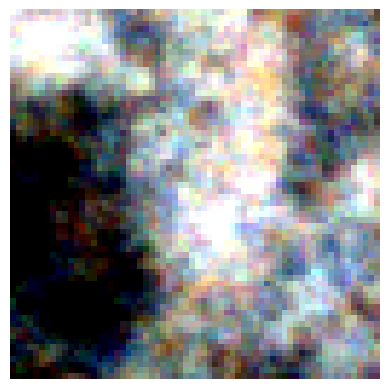

In [51]:
simplexnoise = GaussianDiffusion.generate_simplex_4noise(x, t, octave=8, frequency=128, persistence=0.8)
# plot_tensor(simplexnoise[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


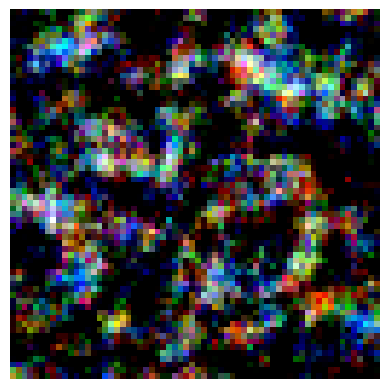

In [52]:
simplexnoise = GaussianDiffusion.generate_simplex_4noise(x, t, octave=8, frequency=8, persistence=0.8)
plot_tensor(simplexnoise[0])

In [53]:
octave=10
persistence=0.8
frequency=128

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


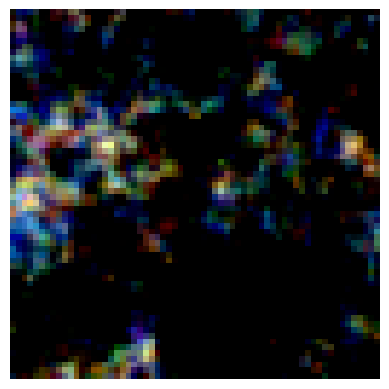

In [67]:
simplexnoise = GaussianDiffusion.generate_simplex_4noise(x, t, octave = 6, frequency = 64, persistence = 0.9)
# simplexnoise = (simplexnoise - torch.min(simplexnoise)) / (torch.max(simplexnoise) - torch.min(simplexnoise))
plot_tensor(simplexnoise[0])

In [68]:
simplexnoise.min()

tensor(-1.7002)

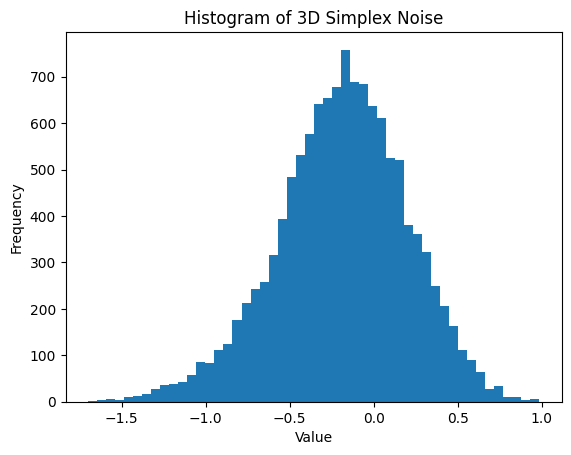

In [69]:
# Generate random noise
noise = simplexnoise.flatten().numpy()
# Plot the histogram
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 3D Simplex Noise')
plt.show()

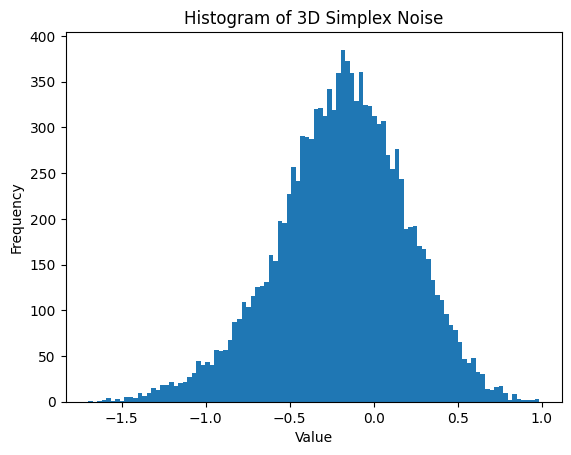

In [70]:
# Generate random noise
noise = simplexnoise.flatten().numpy()
# Plot the histogram
plt.hist(noise, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 3D Simplex Noise')
plt.show()

In [71]:
import torch

def compute_kurtosis(tensor):
    mean = torch.mean(tensor)
    std = torch.std(tensor)
    centered_data = tensor - mean
    fourth_moment = torch.mean(centered_data ** 4)
    n = tensor.numel()
    kurtosis = (fourth_moment / std**4) - 3.0 * ((n - 1.0) / ((n - 2.0) * (n - 3.0)))
    return kurtosis



In [72]:
# n = tensor.numel()

In [73]:
# n

In [74]:
simplexnoise.shape

torch.Size([1, 3, 64, 64])

In [75]:
array = simplexnoise.flatten()
# array = tensor

In [76]:
# kurtosis = torch.mean(torch.pow((array - torch.mean(array)) / torch.std(array), 4.0)) - 3.0

In [77]:
# kurtosis

In [78]:
import numpy as np
from scipy.stats import kurtosis, skew

# x = np.random.normal(0, 1, 100000)   # create random values based on a normal distribution

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(array, fisher=False) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(array) ))

excess kurtosis of normal distribution (should be 0): 3.1773913219208003
skewness of normal distribution (should be 0): -0.28582939199525365


In [668]:
# import numpy as np
# from scipy.stats import kurtosis, skew

# x_random = np.random.normal(0, 2, 10000)

# x = np.linspace( -5, 5, 10000 )
# y = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )  # normal distribution

# import matplotlib.pyplot as plt

# f, (ax1, ax2) = plt.subplots(1, 2)
# ax1.hist(x_random, bins='auto')
# ax1.set_title('probability density (random)')
# ax2.hist(y, bins='auto')
# ax2.set_title('(your dataset)')
# plt.tight_layout()

In [272]:
# simplexnoise = GaussianDiffusion.generate_simplex_4noise(x, t, octave=8, frequency=128, persistence=1)
# plot_tensor(simplexnoise[0])

In [69]:
x = torch.rand(1, 1, 64, 64)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


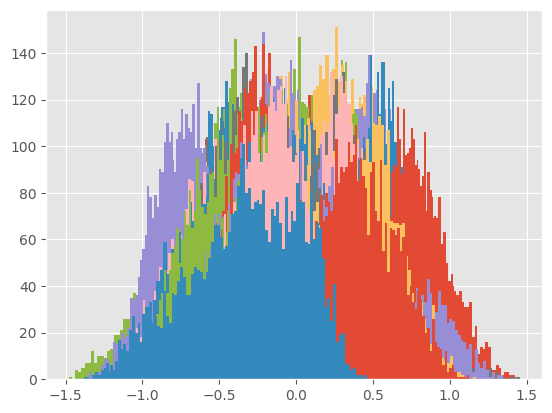

In [75]:
# %matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew

import matplotlib.pyplot as plt

plt.style.use('ggplot')
mean_arr = []
var_arr = []
skew_arr = []
kurtosis_arr = []
parms_octave = []
parms_frequency = []
parms_persistence = []
noise = []
parms_num_timesteps = []
sample_size = 100
octave = 8
persistence = 0.8
frequency = 128
num_timesteps = 10
for i in range(sample_size):
#     t = torch.randint(0, num_timesteps, (x.shape[0],), device=x.device)
    t = torch.tensor([num_timesteps]*x.shape[0], device = x.device).reshape(x.shape[0],)
#     print(t)
    simplexnoise = GaussianDiffusion.generate_simplex_4noise(x, t, octave=octave, frequency=frequency, persistence=persistence)
    data = simplexnoise.flatten().numpy()
#     plot_tensor(simplexnoise[0])
    plt.hist(data, bins=100, label="num_timesteps")
    mean_arr.append(np.mean(data))
    var_arr.append(np.var(data))
    skew_arr.append(skew(data))
    kurtosis_arr.append(kurtosis(data, fisher=False))
    parms_octave.append(octave)
    parms_frequency.append(frequency)
    parms_persistence.append(persistence)
    parms_num_timesteps.append(num_timesteps)
#     frequency = frequency*2
    print(i)
    num_timesteps+=10
#     octave+=1
#     noise.append()
#     print("mean : ", np.mean(data))
#     print("var  : ", np.var(data))
#     print("skew : ", skew(data))
#     print("kurt : ", kurtosis(data, fisher=False))
    

In [58]:
# parms_num_timesteps

In [76]:
import pandas as pd

In [77]:
import pandas as pd

data = {'mean_arr' : mean_arr, 
         'var_arr' : var_arr,
         'skew_arr' : skew_arr, 
         'kurtosis_arr' : kurtosis_arr,
         'parms_octave' : parms_octave, 
         'parms_frequency' : parms_frequency,
         'parms_persistence' : parms_persistence,
         'num_timesteps' : parms_num_timesteps}

df = pd.DataFrame(data)

# # Print the DataFrame
# print(df)


In [78]:
df

,mean_arr,var_arr,skew_arr,kurtosis_arr,parms_octave,parms_frequency,parms_persistence,num_timesteps
0,0.523332,0.118678,-0.060666,1.923322,8,128,0.8,10
1,-0.420150,0.087251,-0.100059,2.291536,8,128,0.8,20
2,0.361227,0.075798,-0.244559,3.107989,8,128,0.8,30
3,0.125658,0.078989,-0.007345,2.652016,8,128,0.8,40
4,-0.086910,0.096876,-0.246645,2.920722,8,128,0.8,50
...,...,...,...,...,...,...,...,...
95,0.303402,0.116103,-0.469975,2.803075,8,128,0.8,960
96,-0.282940,0.079321,-0.122153,2.576865,8,128,0.8,970
97,-0.184788,0.047493,-0.478965,3.525050,8,128,0.8,980
98,0.355893,0.083155,-0.205713,2.721521,8,128,0.8,990


In [81]:
df.to_csv("Simplex_Outputs/symmetricity_num_timesteps.csv")

In [80]:
import kornia

In [4]:
import torch
import kornia
import torch.nn.functional as F
# Assuming you have a tensor of shape (1, 1, 256, 256) named 'binary_mask'
# You can perform dilation and erosion as follows:

# Convert the binary mask to uint8 for kornia operations
# binary_mask = binary_mask.byte()

# # Define a structuring element for dilation and erosion
# kernel_size = 3
# structuring_element = torch.ones(1, 1, kernel_size, kernel_size)

# # Perform dilation
# dilated_mask = kornia.morphology.dilation2d(binary_mask, kernel=structuring_element)

# # Perform erosion
# eroded_mask = kornia.morphology.erosion2d(binary_mask, kernel=structuring_element)


In [5]:
import torch
import kornia
import torch.nn.functional as F
def MorphOperat(binary_mask):
    # Assuming you have a tensor of shape (1, 1, 256, 256) named 'binary_mask'
    # You can perform dilation and erosion as follows:

    # Convert the binary mask to uint8 for kornia operations
    binary_mask = binary_mask.byte()

    # Define a structuring element for dilation and erosion
    kernel_size = 3
    structuring_element = torch.ones(1, 1, kernel_size, kernel_size)

    # Perform dilation
    dilated_mask = F.conv2d(binary_mask.float(), structuring_element.float(), padding=1) > 0

    # Perform erosion
    eroded_mask = 1 - F.conv2d((1 - binary_mask).float(), structuring_element.float(), padding=1) > 0
    
    return dilated_mask, eroded_mask

In [6]:
import cv2
path = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainMRI\ground_truth\bad\Y1.png"
# Load the grayscale image
gray_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def adaptiveThreshold(gray_image):
    gray_image = torch.clamp(torch.round(gray_image * 255.0), 0, 255).byte().numpy()
    
    # Apply adaptive thresholding
    binary_mask = cv2.adaptiveThreshold(gray_image, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Display the original and binary images (optional)
    cv2.imshow("Original Image", gray_image)
    cv2.imshow("Binary Mask (Adaptive)", binary_mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return binary_mask


In [21]:
import cv2
import numpy as np

def batch_threshold(batch_images, threshold_value):
    """
    Apply thresholding to a batch of grayscale images.

    Args:
        batch_images (numpy.ndarray): A 4D numpy array representing the batch of grayscale images.
                                     The shape should be (batch_size, 1, height, width).
        threshold_value (int): The threshold value used for thresholding.

    Returns:
        numpy.ndarray: A 4D numpy array representing the batch of thresholded binary masks.
                       The shape is the same as the input batch_images.
    """
    batch_size, _, height, width = batch_images.shape
    batch_thresholded = np.empty_like(batch_images)
    batch_Adthresholded = np.empty_like(batch_images)
    batch_images = torch.clamp(torch.round(batch_images * 255.0), 0, 255).byte().numpy()
    for i in range(batch_size):
        image = batch_images[i, 0]  # Extract the grayscale image from the batch
        _, binary_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
        # Apply adaptive thresholding
        binary_adpmask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        batch_thresholded[i, 0] = binary_mask
        batch_Adthresholded[i, 0] = binary_adpmask
    return batch_thresholded, batch_Adthresholded


In [22]:
gray_image = torch.rand(1, 1, 256, 256)

In [23]:
# gray_image

In [26]:
batch_threshold(gray_image, 128)[1].shape

(1, 1, 256, 256)

In [781]:
binary_mask = torch.from_numpy(gray_image).unsqueeze(0).unsqueeze(0)

In [782]:
binary_mask.shape

torch.Size([1, 1, 171, 141])

In [783]:
o1, o2 = MorphOperat(binary_mask)

In [784]:
o1.shape

torch.Size([1, 1, 171, 141])

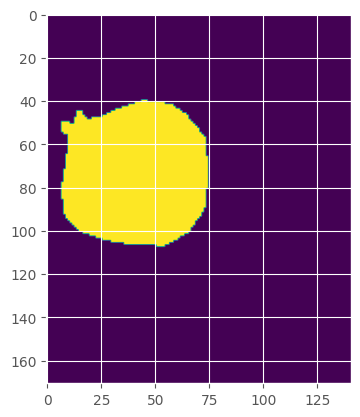

In [785]:
plt.imshow(o1[0][0])

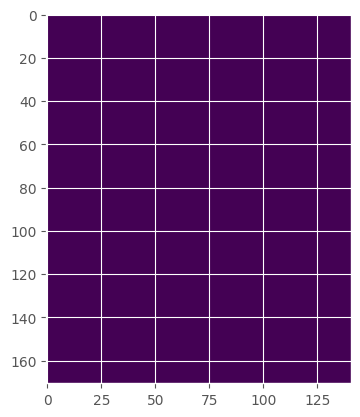

In [786]:
plt.imshow(o2[0][0])

In [742]:
binary_mask.max()

255

In [744]:
gray_image.max()

255

In [37]:
import cv2
import numpy as np

# Assuming you have a binary mask as a NumPy array of shape (batch_size, height, width)
# and each image in the batch is a single-channel (grayscale) binary mask.

def connected_component_analysis_batch(binary_masks):
    """
    Perform connected component analysis on a batch of binary masks using OpenCV.

    Args:
        binary_masks (numpy.ndarray): A 3D numpy array representing the batch of binary masks.
                                     The shape should be (batch_size, height, width).

    Returns:
        list: A list of NumPy arrays, where each array represents the connected components for
              the corresponding image in the batch. The output is a list of 2D arrays, where each
              array is of the same size as the input image and contains the connected component
              labels for each pixel.
    """
    binary_masks = torch.clamp(torch.round(binary_masks * 255.0), 0, 255).byte().numpy()
    batch_connected_components = []
    for i in range(binary_masks.shape[0]):
        # Convert the binary mask to uint8 (0 or 255)
        binary_mask = (binary_masks[i] * 255).astype(np.uint8)[0]

        # Perform connected component analysis
        num_labels, labels = cv2.connectedComponents(binary_mask, )

        # Append the connected components to the batch list
        batch_connected_components.append(labels)
    batch_connected_components = np.array(batch_connected_components)
    return batch_connected_components


In [38]:
import numpy as np

batch_binary_masks = torch.rand(1, 1, 256, 256)
batch_connected_components = connected_component_analysis_batch(batch_binary_masks)


In [51]:
batch_connected_components

[array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=int32)]

In [70]:
import torch
import torchvision
import matplotlib.pyplot as plt

def gridify_output_with_annotations(img, row_size=-1):
    scale_img = lambda img: ((img + 1) * 127.5).clamp(0, 255).to(torch.uint8)
    grid = torchvision.utils.make_grid(scale_img(img), nrow=row_size, pad_value=-1).cpu().data.permute(0, 2, 1).contiguous().permute(2, 1, 0)

    # Create the plot and add the grid of images
    plt.imshow(grid)
    
    # Get the size of each image in the grid
    grid_height, grid_width, _ = grid.shape
    image_height = grid_height // (img.shape[0] // row_size)
    image_width = grid_width // row_size

    # Add the name as text above each image
    for i in range(img.shape[0]):
        row_idx = i // row_size
        col_idx = i % row_size
        image_name = f"Image {i+1}"
        text_x = (col_idx * image_width) + (image_width / 2)
        text_y = (row_idx * image_height) - 10  # Adjust the -10 value to change the vertical position of the text
        plt.text(text_x, text_y, image_name, fontsize=12, ha='center', color='white')

    plt.axis('off')
    plt.show()




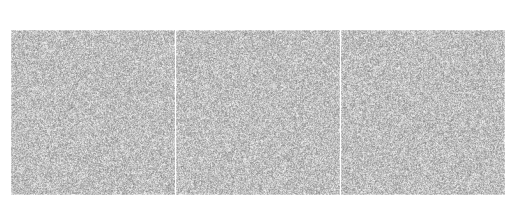

In [71]:
img = torch.rand(3, 1, 256, 256)
gridify_output_with_annotations(img, row_size=3)

In [79]:
import torch
import torchvision
import matplotlib.pyplot as plt

def gridify_output_with_annotations(img, row_size=-1):
    scale_img = lambda img: ((img + 1) * 127.5).clamp(0, 255).to(torch.uint8)
    grid = torchvision.utils.make_grid(scale_img(img), nrow=row_size, pad_value=-1).cpu().data.permute(0, 2, 1).contiguous().permute(2, 1, 0)

    # Calculate the number of rows needed for the grid
    num_images = img.shape[0]
    if row_size == -1:
        row_size = num_images
    num_rows = (num_images - 1) // row_size + 1

    # Determine the size of each image in the grid
    grid_height, grid_width, _ = grid.shape
    image_height = grid_height // num_rows
    image_width = grid_width // row_size

    # Create the plot and add the grid of images
    plt.figure(figsize=(row_size * 3, num_rows * 3))
    plt.imshow(grid)

    # Add the name as text in the top-left corner of each image
    for i in range(num_images):
        row_idx = i // row_size
        col_idx = i % row_size
        image_name = f"Image {i+1}"
        text_x = (col_idx * image_width) + (image_width * 0.02)  # Adjust the 0.02 value to change the horizontal spacing of the text
        text_y = (row_idx * image_height) + (image_height * 0.02)  # Adjust the 0.02 value to change the vertical spacing of the text
        plt.text(text_x, text_y, image_name, fontsize=12, ha='left', va='top', color='white')

    plt.axis('off')
    plt.show()



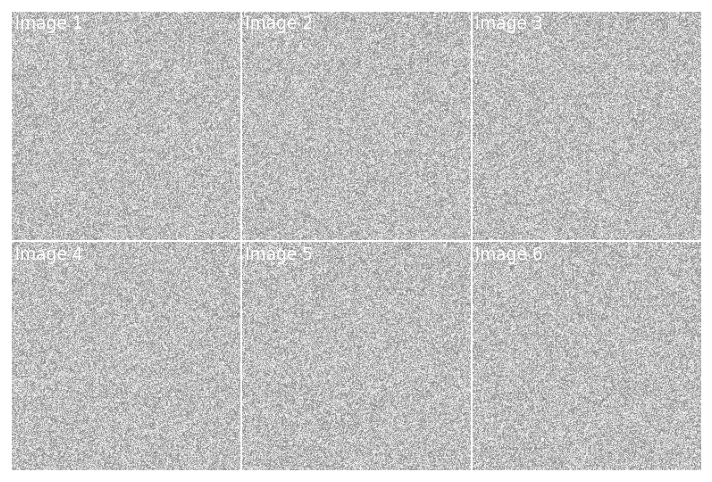

In [81]:
img = torch.rand(6, 1, 256, 256)
gridify_output_with_annotations(img, row_size=3)

In [7]:
p = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\diffusion-videos\ARGS=42\Anomalous\Y59.pngt=200.png"

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(p, cv2.IMREAD_UNCHANGED);
image = torch.rand(256, 256)
image = torch.clamp(torch.round(image * 255.0), 0, 255).byte().cpu().numpy()
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# getting mask with connectComponents
ret, labels = cv2.connectedComponents(binary)
# for label in range(1,ret):
#     mask = np.array(labels, dtype=np.uint8)
#     mask[labels == label] = 255
#     cv2.imshow('component', mask)
#     cv2.waitKey(0)

# getting ROIs with findContours
# contours = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
# for cnt in contours:
#     (x,y,w,h) = cv2.boundingRect(cnt)
#     ROI = image[y:y+h,x:x+w]
#     cv2.imshow('ROI', ROI)
# #     cv2.waitKey(0)

# cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 5 (CV_32FC1)


In [24]:
import torch
import cv2
import numpy as np

 # Add singleton dimensions to match the original shape

# Now thresholded_tensor contains the thresholded binary masks as a torch tensor.


In [22]:
image.shape

(256, 256)

In [9]:
gray.shape

(2400, 1600)

In [10]:
binary.shape

(2400, 1600)

In [11]:
image.shape

(2400, 1600, 4)

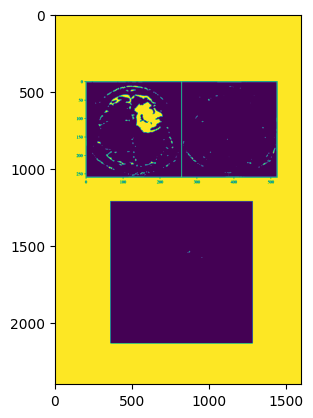

In [9]:
plt.imshow(binary)